In [1]:
import keras

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.models.Sequential()

model.add(Conv2D(filters=20, kernel_size=(5, 5), strides=(3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=50, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=150, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [3]:
from keras import optimizers

optim = optimizers.Adam(
    lr=0.001, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=None, 
    decay=1e-6, 
    amsgrad=False
)

model.compile(**{
    'loss': 'binary_crossentropy',
    'optimizer': optim,
    'metrics': [
        'accuracy',
    ],
})

In [4]:
import os
import numpy as np

image_paths = [n for n in os.listdir('/home/ec2-user/data/') if n.endswith('.npy')]

def get_data(key):
    return np.load('/home/ec2-user/data/' + key)

In [5]:
import random

withhold_test = 5000

random.shuffle(image_paths)
training_set = image_paths[withhold_test:]
test_set = image_paths[:withhold_test]

def pull_values(dataset):
    while True:
        random.shuffle(dataset)
        for key in dataset:
            yield (get_data(key), key)
            
def get_generator(dataset, batch_size):
    batch_inputs = []
    batch_targets = []
    batch_count = 0
    for data, key in pull_values(dataset):
        batch_inputs.append(data)
        if key[:5] == 'anime':
            batch_targets.append((0, 1))
        else:
            batch_targets.append((1, 0))
        batch_count += 1
        if batch_count == batch_size:
            batch_count = 0
            yield np.asarray(batch_inputs), np.asarray(batch_targets)
            batch_inputs = []
            batch_targets = []

train_generator = get_generator(training_set, 50)
test_generator = get_generator(test_set, 10)

In [ ]:
from keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.fit_generator(**{
    'generator': train_generator,
    'steps_per_epoch': len(training_set) // 50,
    
    'validation_data': test_generator,
    'validation_steps': len(test_set) // 10,
    
    'workers': 3,
    'epochs': 1,
    
    'verbose': 1,
    'callbacks': [
        tensorboard,
    ]
})

Epoch 1/1
  4/514 [..............................] - ETA: 1:29:33 - loss: 0.9059 - acc: 0.4900

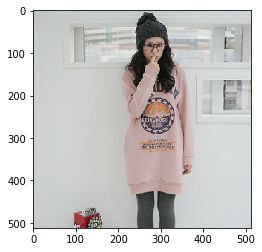

In [7]:
from matplotlib.pyplot import imshow

img0 = get_data(image_paths[1])

%matplotlib inline
imshow(img0)